# MLCMS Exercise 5

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy

import utils
import plotter
from solver import SolverLinear, SolverRadialBasis

DATA_PATH = os.getcwd() + "/data/"
FIGURE_PATH = "figures/"

plt.rcParams['figure.dpi'] = 200
# plt.rcParams["figure.autolayout"] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1
### Reading in Data

In [94]:
A = np.loadtxt(DATA_PATH + "linear_function_data.txt")
B = np.loadtxt(DATA_PATH + "nonlinear_function_data.txt")
X_a = A[:, 0]
F_a = A[:, 1]
X_b = B[:, 0]
F_b = B[:, 1]

Explore data

### Approximating Dataset (A) by a Linear Function
From the sheet we can use that
$$
\begin{aligned}
    (X^T X) \hat{A}^T = X^T F
\end{aligned}
$$
In our case $X^T X$ and $X^T F$ are scalars, hence $\hat{A}^T =: a$ is too.

In [95]:
slope_a = utils.linear_basis_lst_sqr_approx(X_a, F_a)
print("Slope = ", slope_a)

Slope =  0.7500002401387145


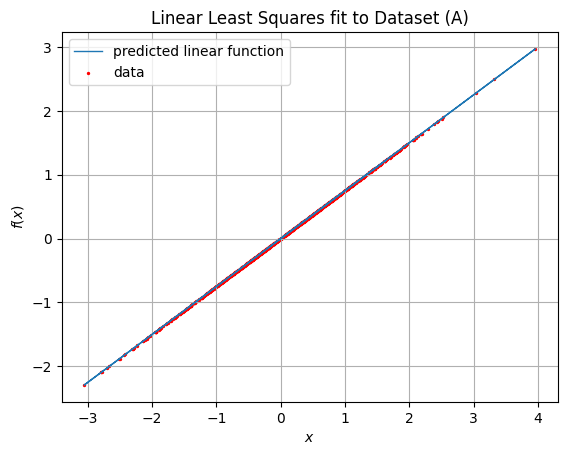

In [43]:
plt.title("Linear Least Squares fit to Dataset (A)")
plt.plot(X_a, slope_a * X_a, linewidth=1, label="predicted linear function")
plotter.basic_data_plot_task1(X_a, F_a)
plt.savefig(FIGURE_PATH + "T1_linear_linear.png", bbox_inches='tight')

### Approximating Dataset (B) by a Linear Function

In [44]:
slope_b = utils.linear_basis_lst_sqr_approx(X_b, F_b)
print("Slope = ", slope_b)

Slope =  0.033210360778119924


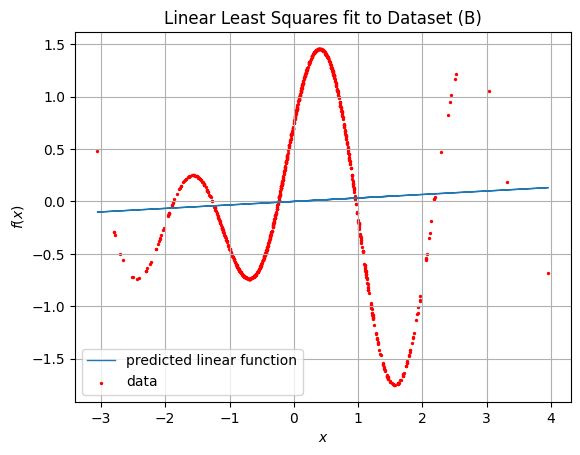

In [45]:
plt.title("Linear Least Squares fit to Dataset (B)")
plt.plot(X_b, slope_b * X_b, linewidth=1, label="predicted linear function")
plotter.basic_data_plot_task1(X_b, F_b)
plt.savefig(FIGURE_PATH + "T1_non-linear_linear.png", bbox_inches='tight')

### Approximating Dataset (B) by a Combination of Radial Functions

To aid our intuition and improve our estimation of the required $L$ and $\epsilon$ we observe that the characteristic features of the data have a characteristic length scale of approximately one, since the maxima and minima have a separation of 1 unit of length. We plot two opposite unit Gaussians next to each other:

Text(0, 0.5, '$f(x)$')

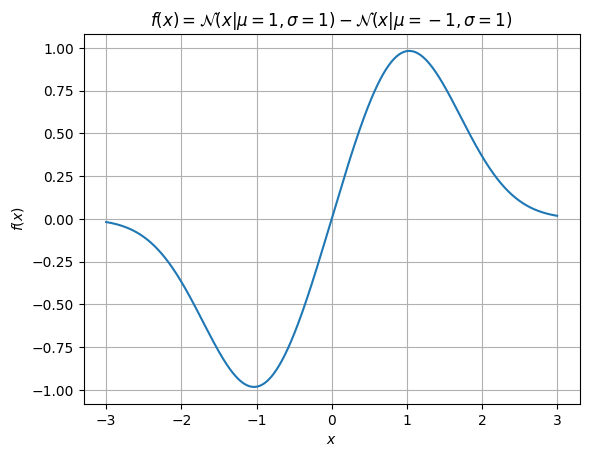

In [46]:
x_gaussian_plot = np.linspace(-3, 3, 1000)
G = np.exp(-(x_gaussian_plot-1)**2) - np.exp(-(x_gaussian_plot+1)**2)
plt.plot(x_gaussian_plot, G)
plt.grid(True)
plt.title(r"$f(x) = \mathcal{N}(x| \mu = 1, \sigma = 1) - \mathcal{N}(x| \mu = -1, \sigma = 1)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.savefig(FIGURE_PATH + "T1_two_gaussians.png", bbox_inches='tight')

For peaks at a distance of one we require the grid spacing of gaussian peaks to be at least on a length scale of $1$. Additionally we note that if the data peaks do not coincide with the grid, we require a higher grid density, hence we double the number of peaks from $8$ at approximately $-3, -2, -1, 0, 1, 2, 3, 4$ to $16$.
Hence we estimate that a good approximation can be achieved by a grid with $L = 16$ at a separation of about $1/2$ with an $\epsilon = 0.5$ as this allows the peaks to be well localized while preserving a reasonable smoothness (no excessive overlap with next nearest neighbor peaks)

In [47]:
EPSILON = 0.5
L = 16
GRID_b = np.linspace(X_b.min(), X_b.max(), L)
R_COND = 1e-2

In [48]:
coefficients = utils.radial_basis_lst_sqr_approx(X_b, F_b, GRID_b, EPSILON, R_COND)
coefficients

array([-0.20979409, -0.41947349, -0.26182823,  0.25024088,  0.13726521,
       -0.7940476 , -0.13490987,  1.01565349,  0.88086545, -0.52542151,
       -1.64241175,  0.0748271 ,  0.78691149,  0.29704133,  0.0853937 ,
        0.01962219])

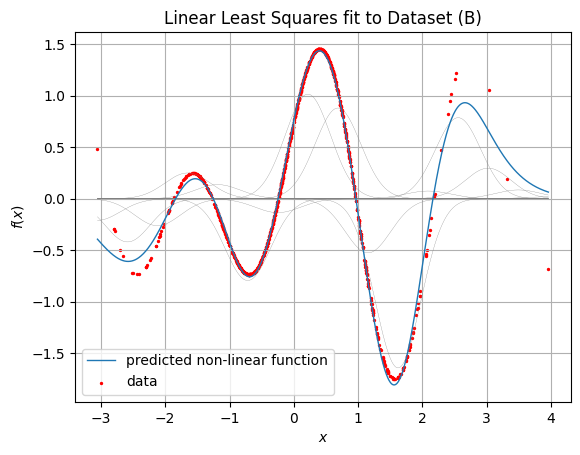

In [49]:
X_plot = np.linspace(X_b.min(), X_b.max(), 1000)
phi_plot = utils.radial_basis(X_plot, GRID_b, epsilon=EPSILON)

# plot contribution from individual basis vectors
for i, c in enumerate(coefficients):
    c_i = np.zeros(L)
    c_i[i] = c
    plt.plot(X_plot, phi_plot @ c_i.T, linewidth=0.2, color="grey")

plt.title("Linear Least Squares fit to Dataset (B)")
plt.plot(X_plot, phi_plot @ coefficients.T, linewidth=1, label="predicted non-linear function")
plotter.basic_data_plot_task1(X_b, F_b)
plt.savefig(FIGURE_PATH + "T1_non-linear_radial.png", bbox_inches='tight')

In [50]:
N = 1000
print("Total MSE", np.linalg.norm(F_b - utils.radial_basis(X_b, GRID_b, EPSILON) @ coefficients.T)**2 / N)

Total MSE 0.0029917257203643318


## Task 2: Approximating linear vector fields
<mark>General warning: When executing individual cells out of order, be careful that the notebook variables
like X_0, X_1, vector_field ... correspond to the correct exercise<mark>

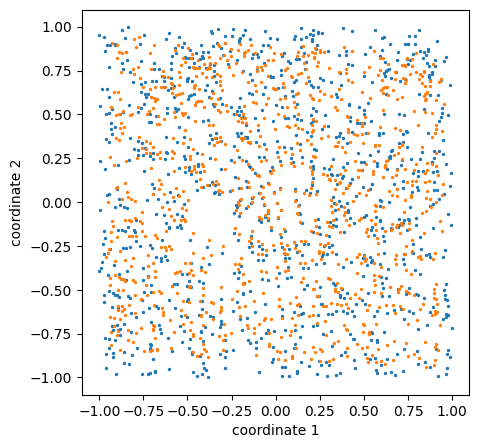

In [99]:
X_0 = np.loadtxt(DATA_PATH + "linear_vectorfield_data_x0.txt")
X_1 = np.loadtxt(DATA_PATH + "linear_vectorfield_data_x1.txt")
plotter.t3_plot_points(X_0, X_1)

### 2.1

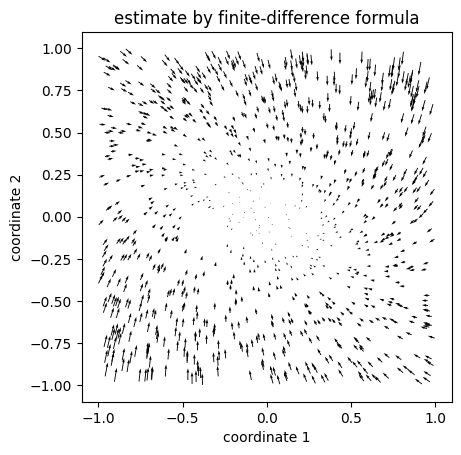

In [100]:
vector_field = utils.vector_field(X_0, X_1, dt=0.1)

ax = plt.gca()
title = "estimate by finite-difference formula"
plotter.t3_plot_vector_fields(vector_field, X_0, ax, title)
plt.show()

In [101]:
A_T, res, _, _ = scipy.linalg.lstsq(X_0, vector_field)
A = A_T.T
print(A)

[[-0.49355245  0.23191153]
 [-0.4638232  -0.95737573]]


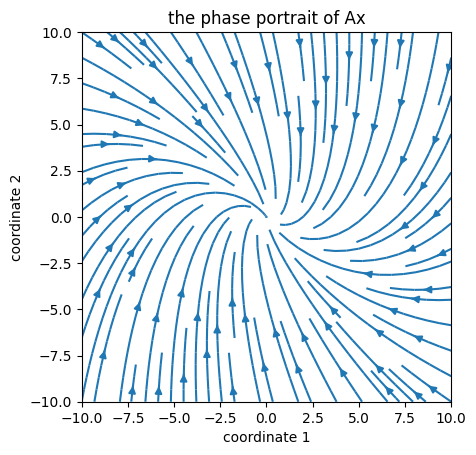

In [102]:
ax = plotter.plot_phase_portrait_linear(10, A)

### 2.2

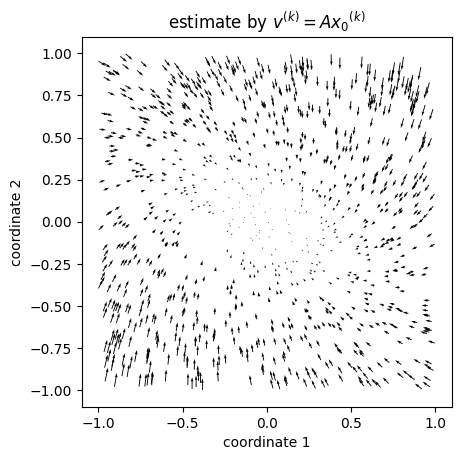

In [103]:
x1_pre = utils.t2_solve(X_0, 0, 0.1, A)
v_pre = (x1_pre - X_0) / 0.1

ax = plt.gca()
title = "estimate by $v^{(k)} = A{x_0}^{(k)}$"
plotter.t3_plot_vector_fields(v_pre, X_0, ax, title)
plt.show()

In [55]:
squared_error = np.linalg.norm(x1_pre - X_1) **2 / len(X_0)
print(f"mse = {squared_error}")

mse = 9.95755729121606e-06


### 2.3

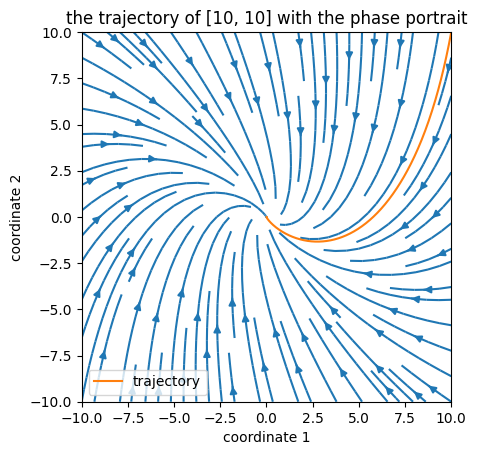

In [93]:
start_time = 0
end_time = 100
x0_point = [10, 10]

# x1_pre = utils.t2_trajectory(x0_point, start_time, end_time, A)

ax = plotter.plot_trajectory_with_phase_portrait_linear(10, A, x0_point, start_time, end_time)
# ax.plot(x1_pre[0,:], x1_pre[1,:], label="trajectory")
# ax.legend()
# ax.set_xlim(-10,10)
# ax.set_ylim(-10,10)
# ax.set_title(ax, 15, "the trajectory of initial point(10,10)")

## Task 3

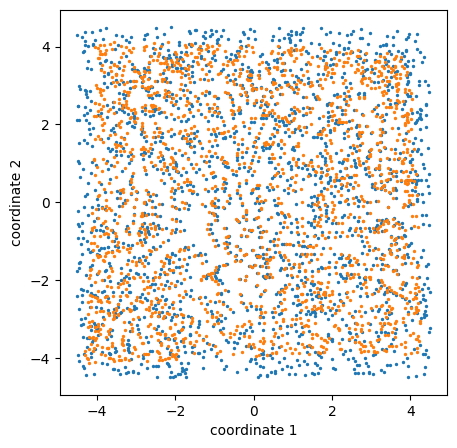

In [57]:
# Careful you need to run this cell to overwrite the data array from Task 3
X_0 = np.loadtxt(DATA_PATH + "nonlinear_vectorfield_data_x0.txt")
X_1 = np.loadtxt(DATA_PATH + "nonlinear_vectorfield_data_x1.txt")
plotter.t3_plot_points(X_0, X_1)

### 3.1 Approximate the vector field using Linear Operator
Compute vector field using finite difference. Compute the matrix $A$ using least square formula $min ||F - X A^T||^2$.

In [58]:
t_0 = 0.0
t_end = 0.1
dt = t_end - t_0

vector_field = utils.vector_field(X_0, X_1, dt)
matrix_a = utils.compute_matrix_a(X_0, vector_field)
print(f' matrix A: \n {matrix_a}')

 matrix A: 
 [[-0.10016012 -0.00253494]
 [ 0.00867272 -0.43267138]]


Solve the system of equations $\dot x = A x$ and compute error using norm 2.

Linear error: 0.01863790922187241


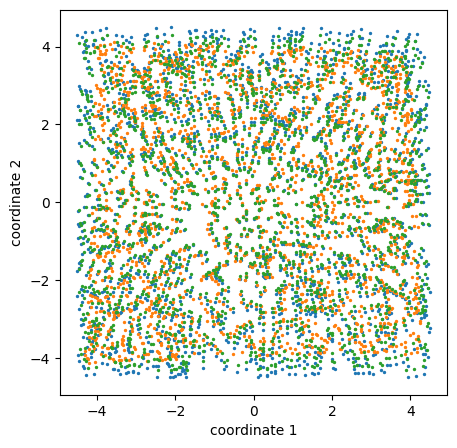

In [59]:
solver = SolverLinear(X_0, t_0, t_end, matrix_a)
x1_linear = solver.solve_linear_system()
error_linear = utils.compute_error(X_1, x1_linear)
print(f'Linear error: {error_linear}')
plotter.t3_plot_points(X_0, X_1, x1_linear)

Plot the vector fields

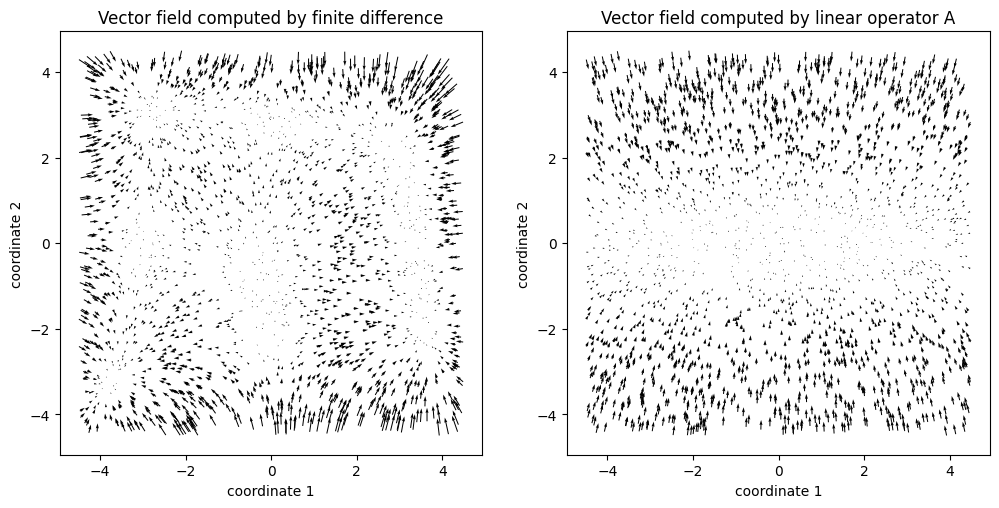

In [60]:
vector_field_computed = (x1_linear - X_0)/dt
title1 = 'Vector field computed by finite difference'
title2 = 'Vector field computed by linear operator A'
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plotter.t3_plot_vector_fields(vector_field, X_0, axes[0], title1)
plotter.t3_plot_vector_fields(vector_field_computed, X_0, axes[1], title2)
plt.show()

### 3.2 Approximate the Vector Field using Radial Basis Functions
Set the values of $\epsilon$, the number of center points $L$ as a grid, and the $cond$ value.

In [61]:
EPSILON = 6.2
L = 10j
GRID_b = np.mgrid[X_0.min():X_0.max():L, X_0.min():X_0.max():L]
GRID_b = GRID_b.reshape((2,GRID_b[0].size)).T
GRID_b[:, [1, 0]] = GRID_b[:, [0, 1]]
R_COND = 1e-5

Compute coefficients $C$ in the minimization problem: $min ||F - \Phi (X) C^T||^2$.

In [62]:
coefficients = utils.radial_basis_lst_sqr_approx(X_0, vector_field, GRID_b, EPSILON, R_COND)

Solve the system of equations $\dot x = C \phi$ and compute error using norm 2.

Linear error: 0.0005768447954420356


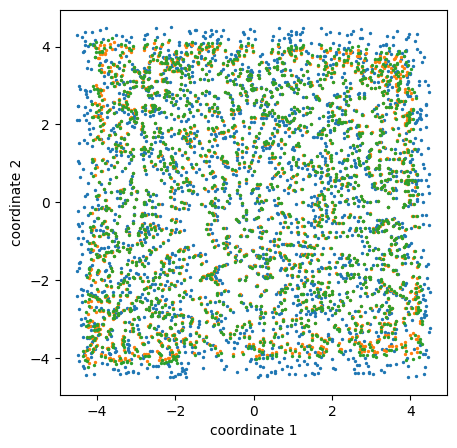

In [63]:
solver = SolverRadialBasis(X_0, t_0, t_end, coefficients, GRID_b, EPSILON)
x1_nonlinear = solver.solve_linear_system()
error_nonlinear = utils.compute_error(X_1, x1_nonlinear)
print(f'Linear error: {error_nonlinear}')
plotter.t3_plot_points(X_0, X_1, x1_nonlinear)

Plot the vector fields

<AxesSubplot: title={'center': 'Vector field computed by radial basis function'}, xlabel='coordinate 1', ylabel='coordinate 2'>

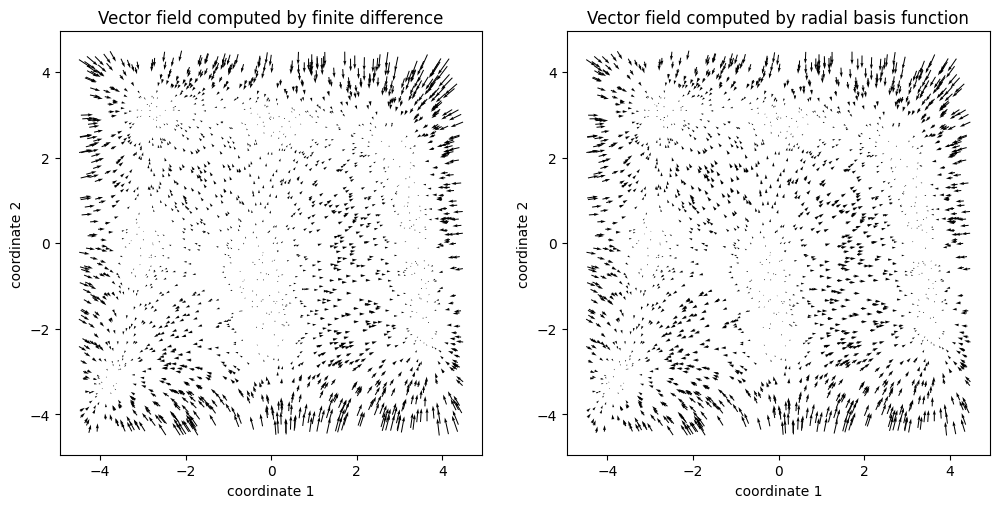

In [64]:
vector_field_computed = (x1_nonlinear - X_0)/dt
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
title3 = 'Vector field computed by radial basis function'
plotter.t3_plot_vector_fields(vector_field, X_0, axes[0], title1)
plotter.t3_plot_vector_fields(vector_field_computed, X_0, axes[1], title3)

### 3.3 Solve for longer time
solve the ODE for a longer period of time.

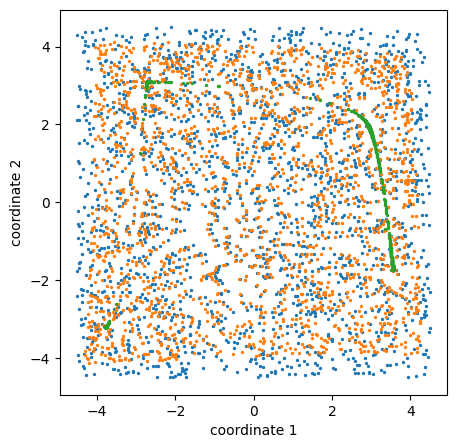

In [65]:
t_end = 5

solver = SolverRadialBasis(X_0, t_0, t_end, coefficients, GRID_b, EPSILON)
x1_nonlinear = solver.solve_linear_system()
error_nonlinear = utils.compute_error(X_1, x1_nonlinear)
plotter.t3_plot_points(X_0, X_1, x1_nonlinear)

## Task 4

In [66]:
T4_DATA = np.loadtxt(DATA_PATH + "takens_1.txt")

In [67]:
X = T4_DATA[:, 0]

Text(0.5, 1.0, 'Periodic $X$ Data of the Manifold')

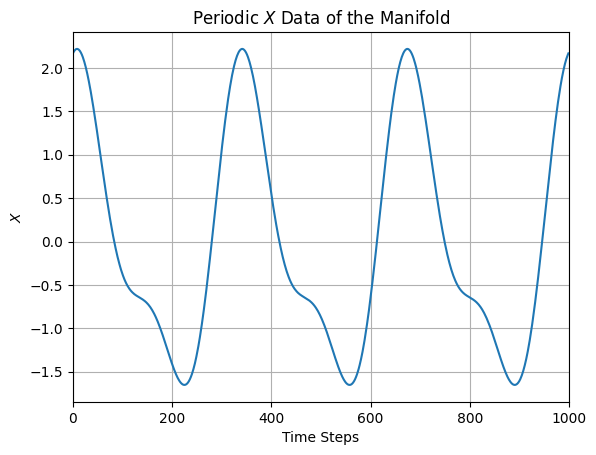

In [68]:
plt.plot(X)
plt.xlabel("Time Steps")
plt.ylabel(r"$X$")
plt.grid(True)
plt.xlim(0,1000)
plt.title(r"Periodic $X$ Data of the Manifold")

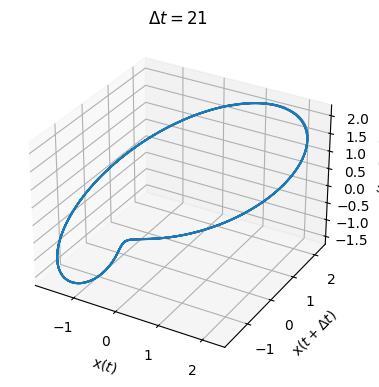

In [69]:
# plotter.t4_takens(X, 1, is_periodic=True)
# plotter.t4_takens(X, 50, is_periodic=True)
# plotter.t4_takens(X, 160, is_periodic=True)
plotter.t4_takens(X, [21], "x", is_periodic=True)

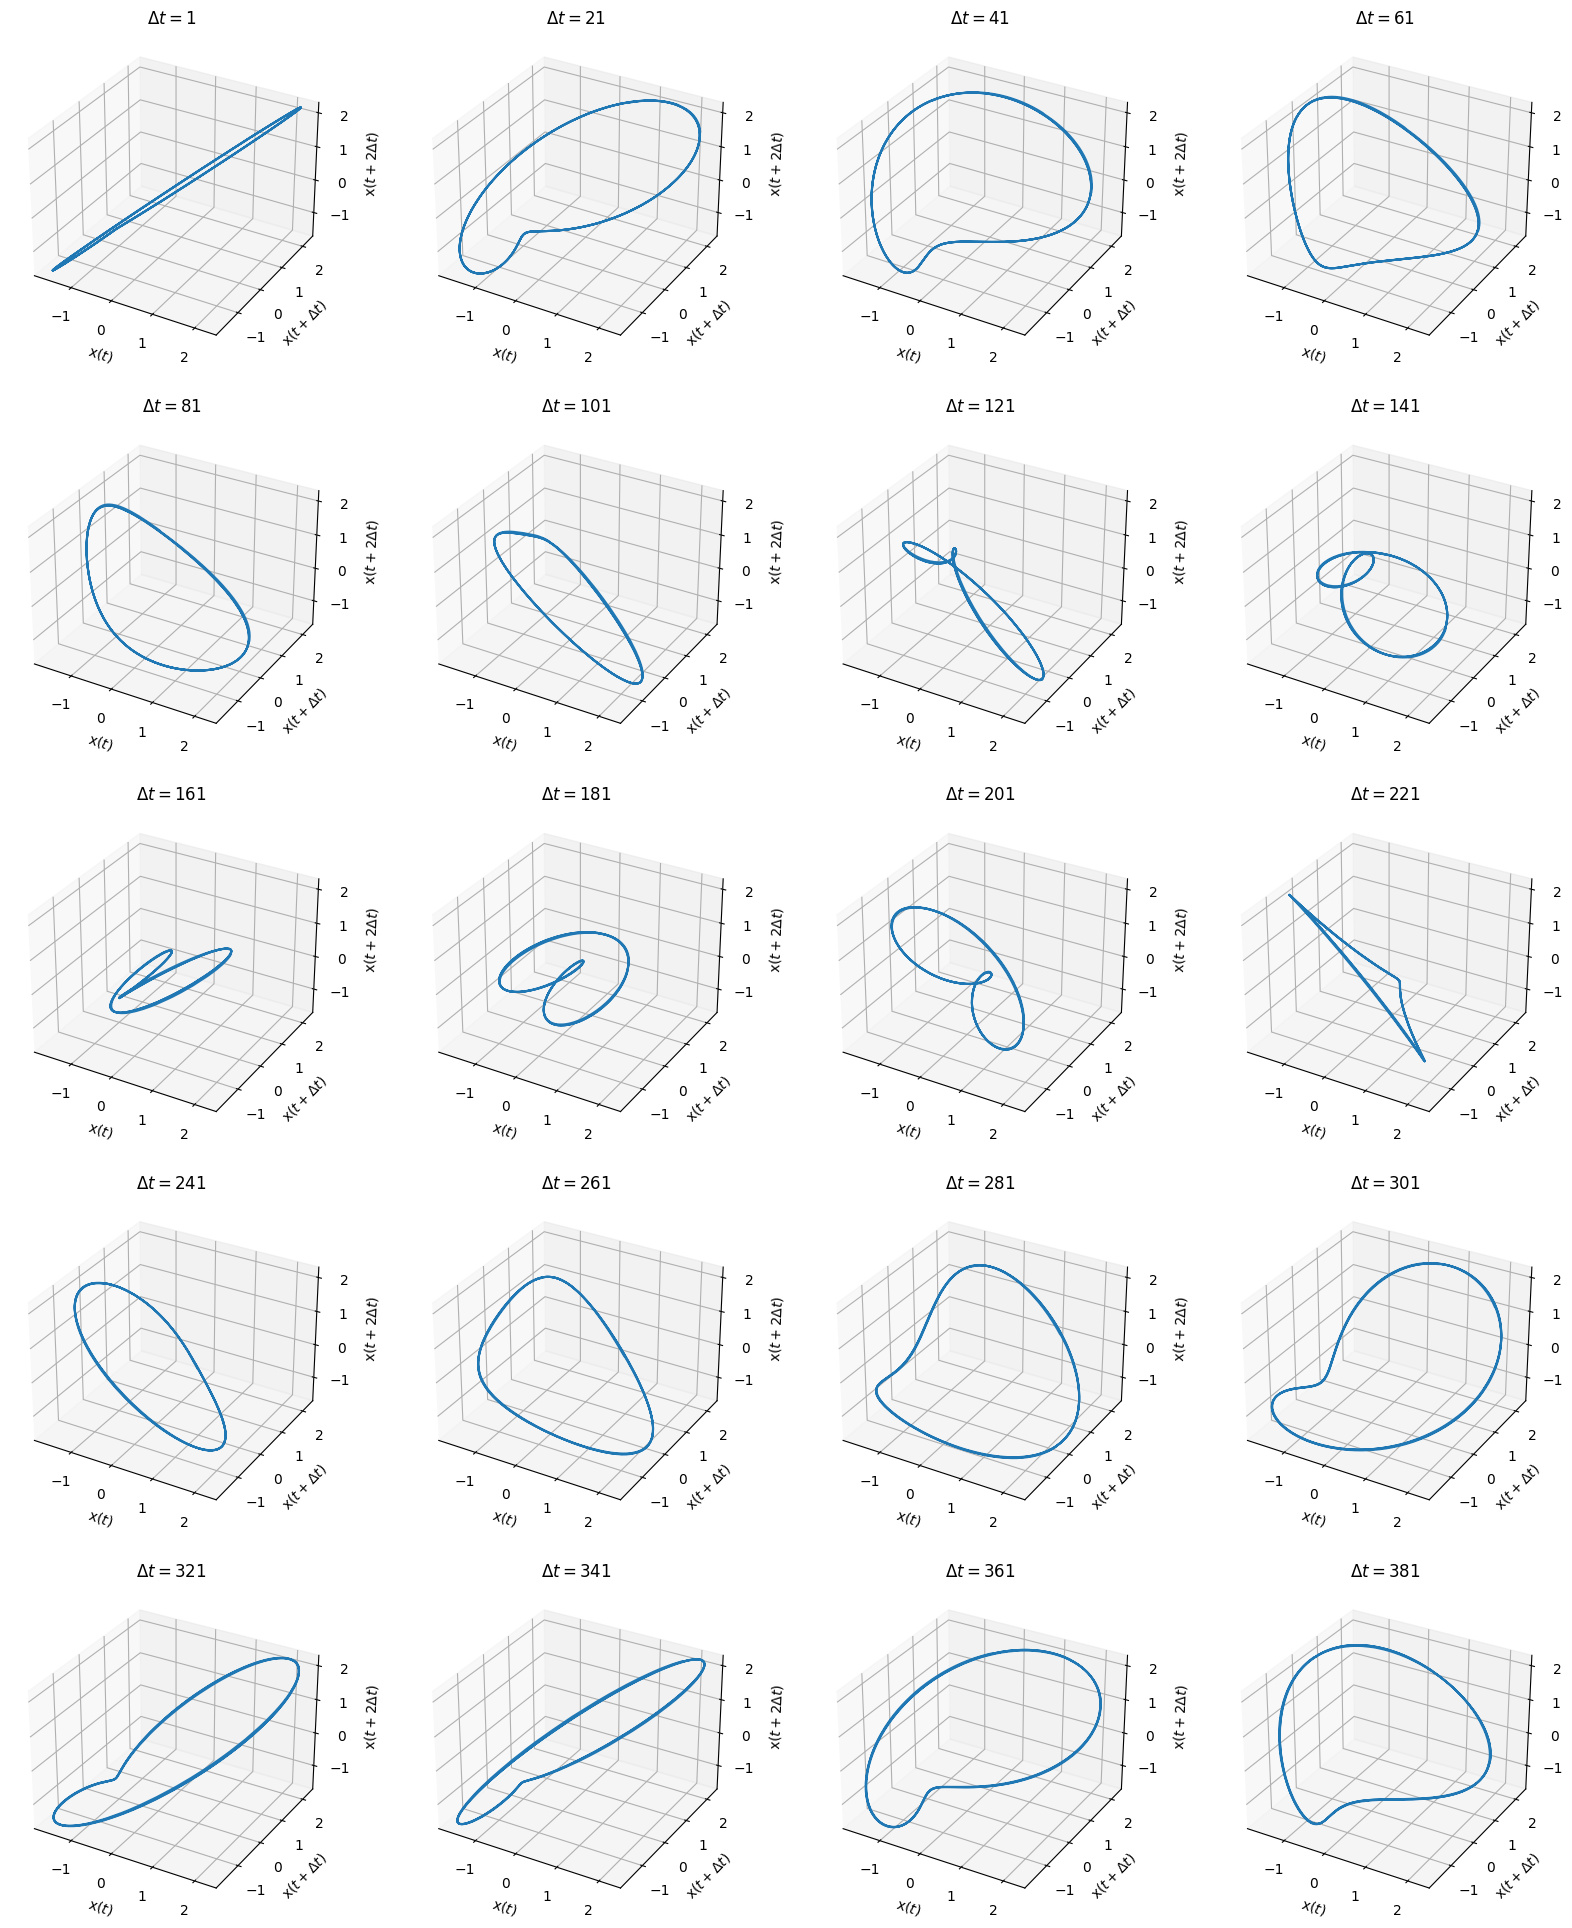

In [70]:
delta_t = np.arange(1,400,20)
plotter.t4_takens(X, delta_t, "x", is_periodic=True)

### 4.2

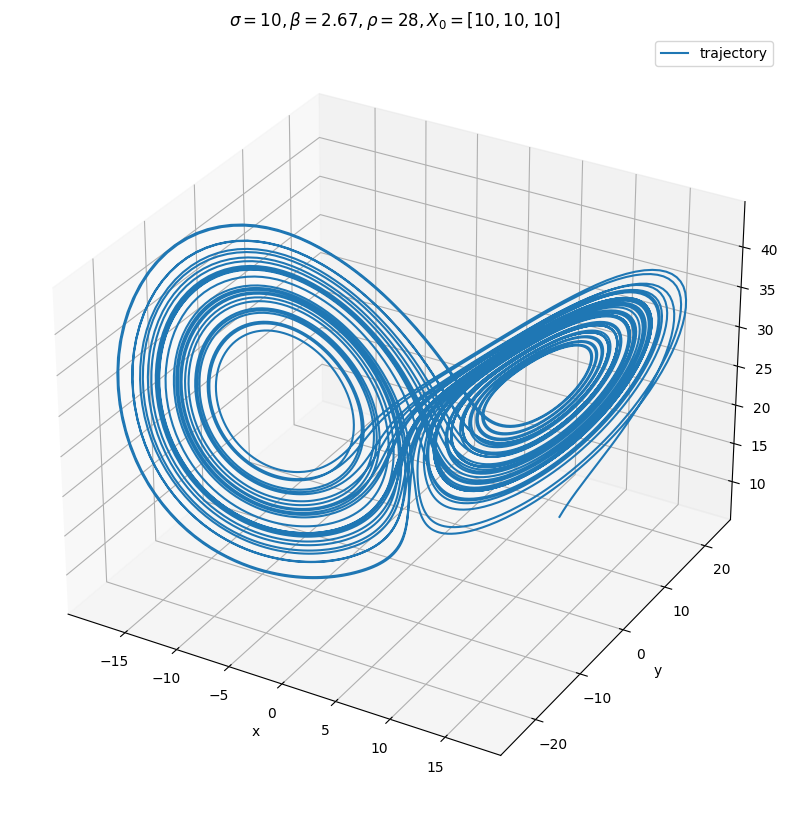

In [71]:
# Parameters:
RHO = 28
SIGMA = 10
BETA = 8/3
X0 = np.array([10, 10, 10])

start_time = 0
end_time = 50
X = utils.lorenz_trajectory(X0, SIGMA, BETA, RHO, start_time, end_time)
X = X.T

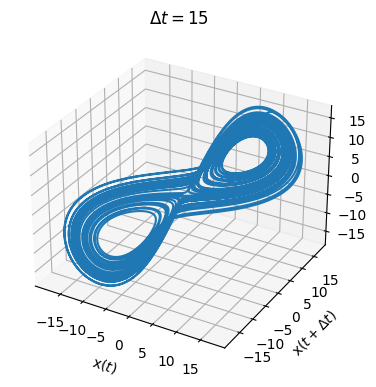

In [72]:
# plotter.t4_takens(X[:, 0], delta_t=15)
# plotter.t4_takens(X[:, 1], delta_t=15)
# plotter.t4_takens(X[:, 2], delta_t=15)

plotter.t4_takens(X[:, 0], [15], "x")

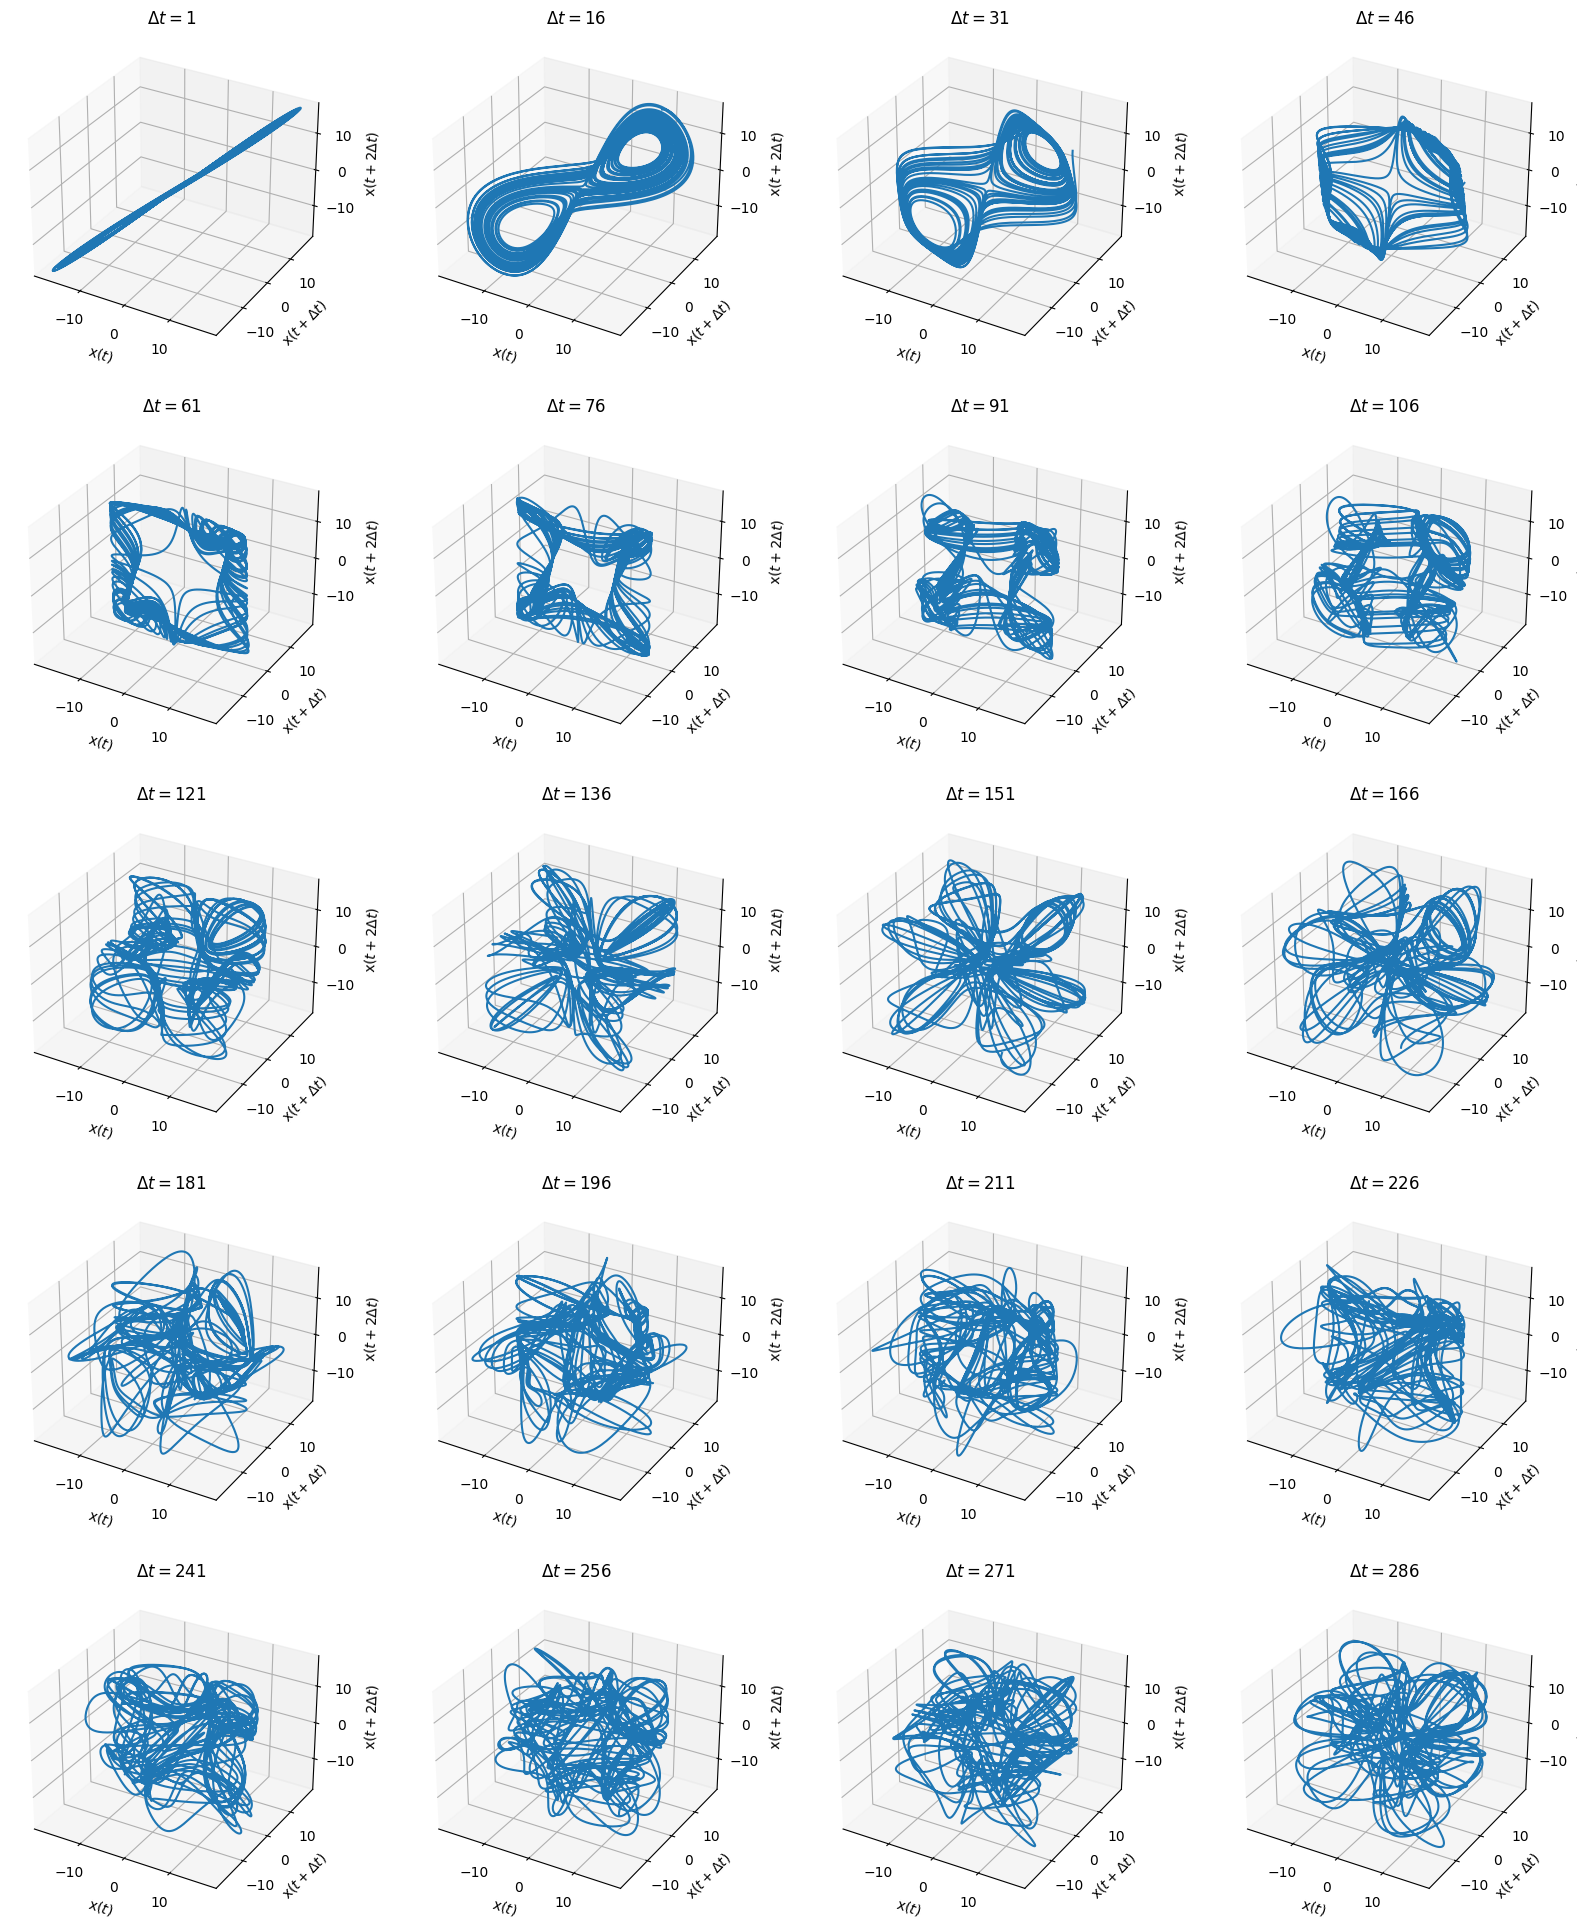

In [73]:
delta_t = np.arange(1,300,15)
plotter.t4_takens(X[:, 0], delta_t, "x")

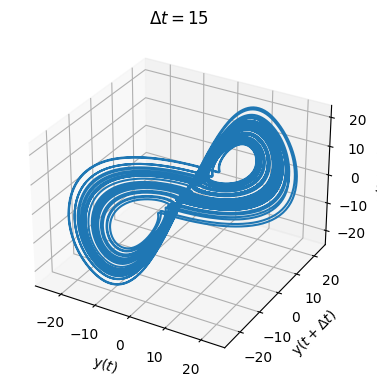

In [74]:
plotter.t4_takens(X[:, 1], [15], "y")

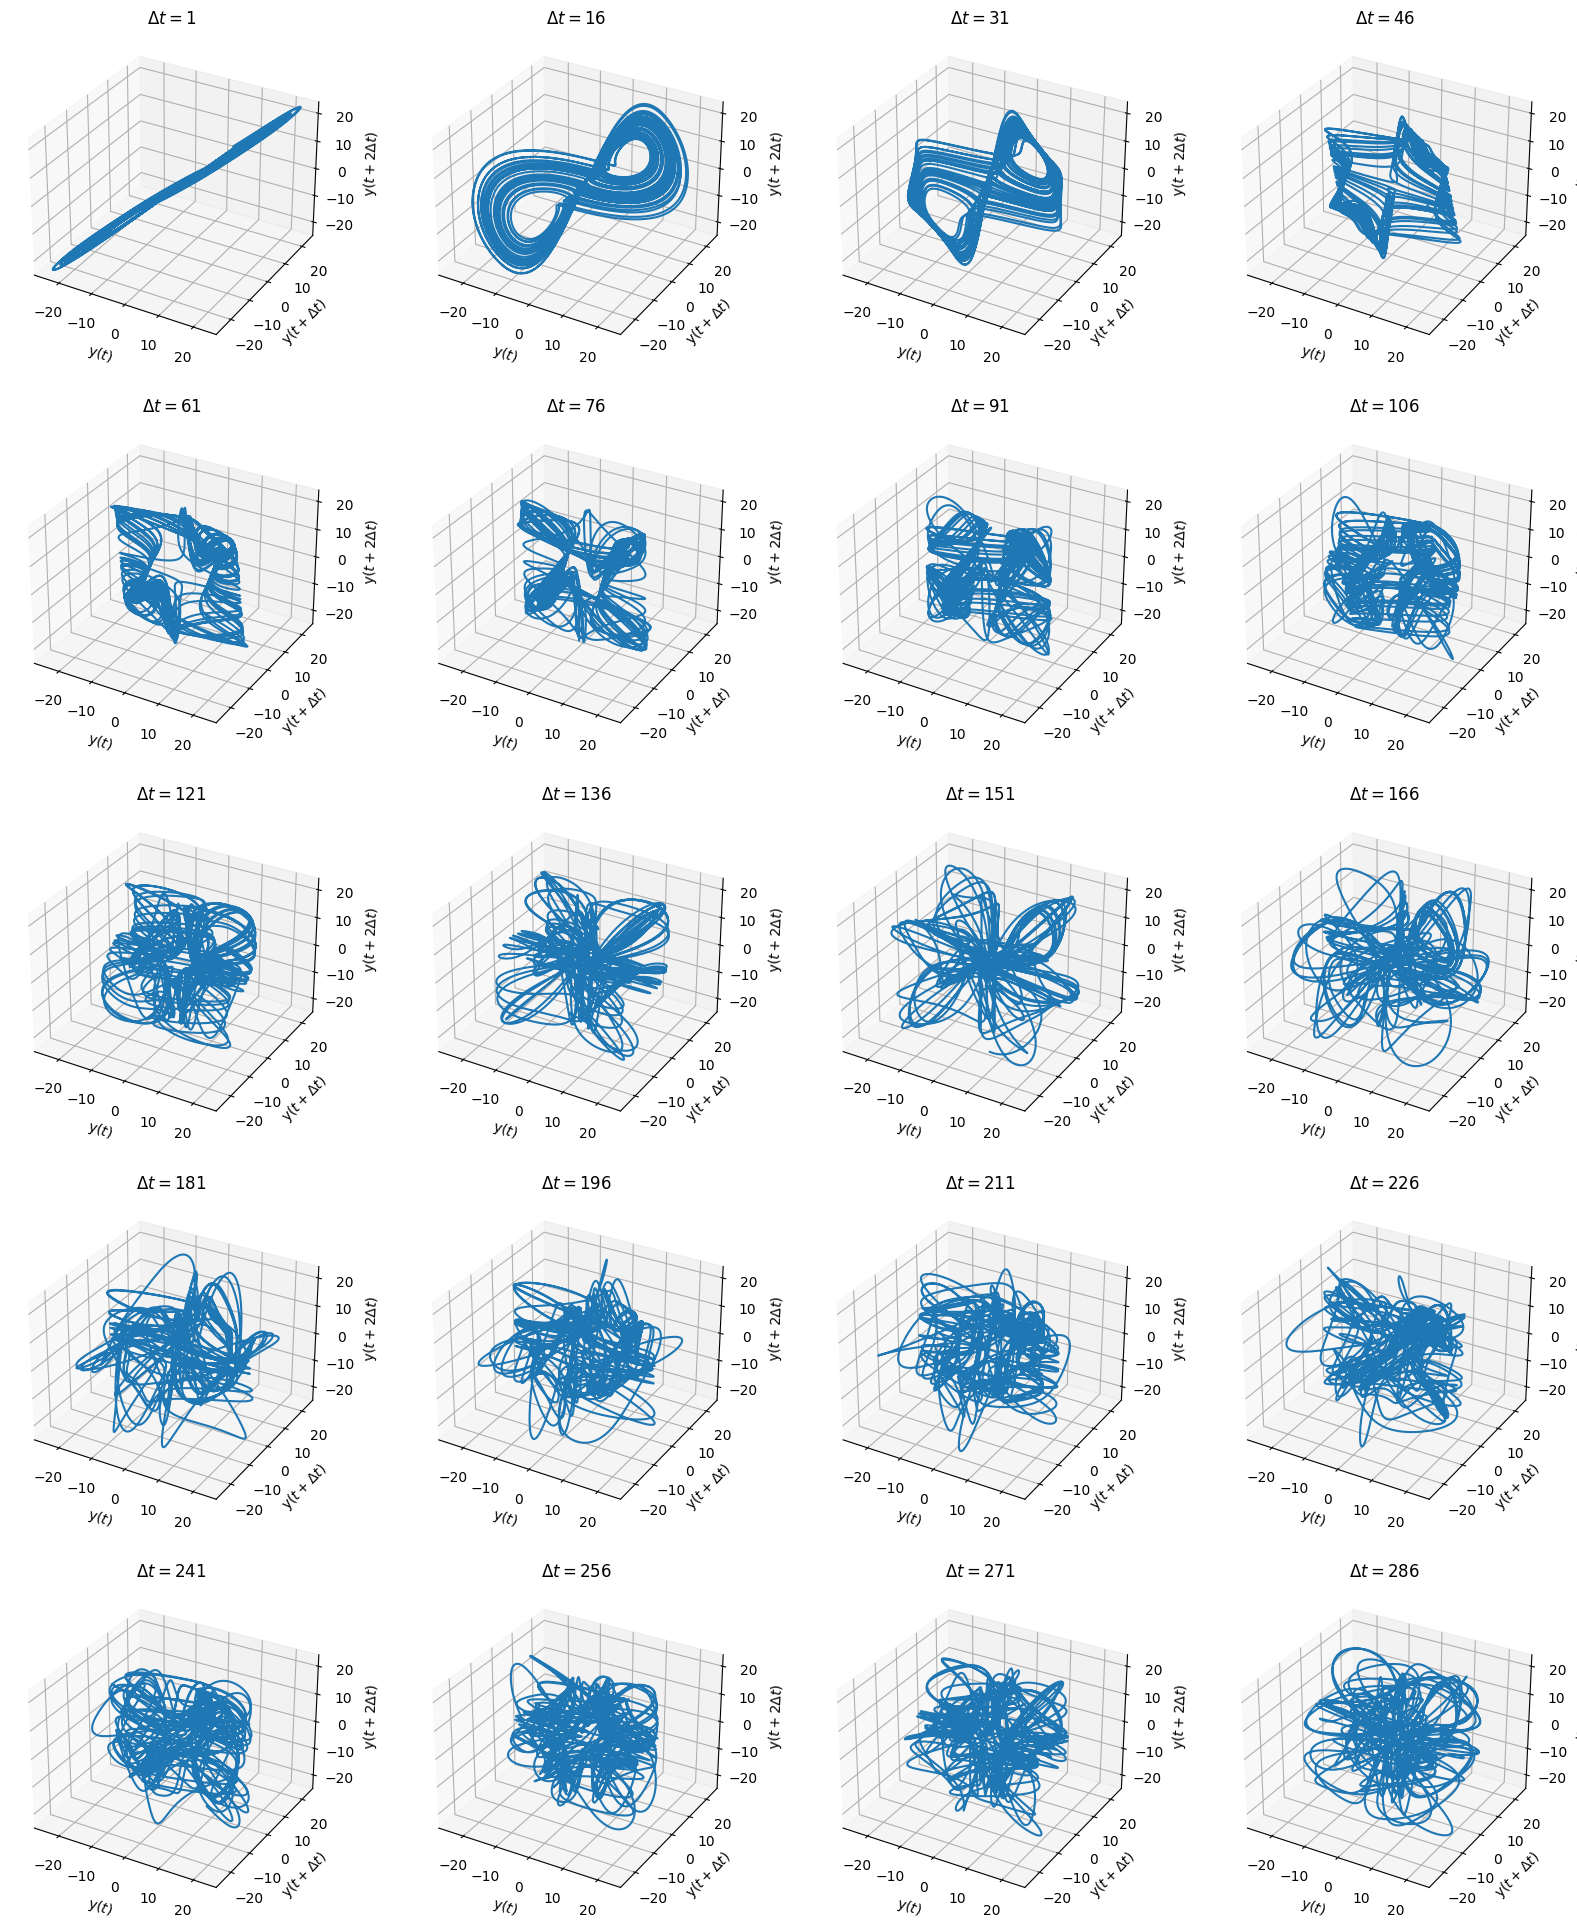

In [75]:
delta_t = np.arange(1,300,15)
plotter.t4_takens(X[:, 1], delta_t, "y")

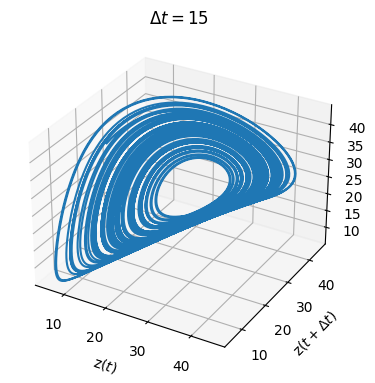

In [76]:
plotter.t4_takens(X[:, 2], [15], "z")

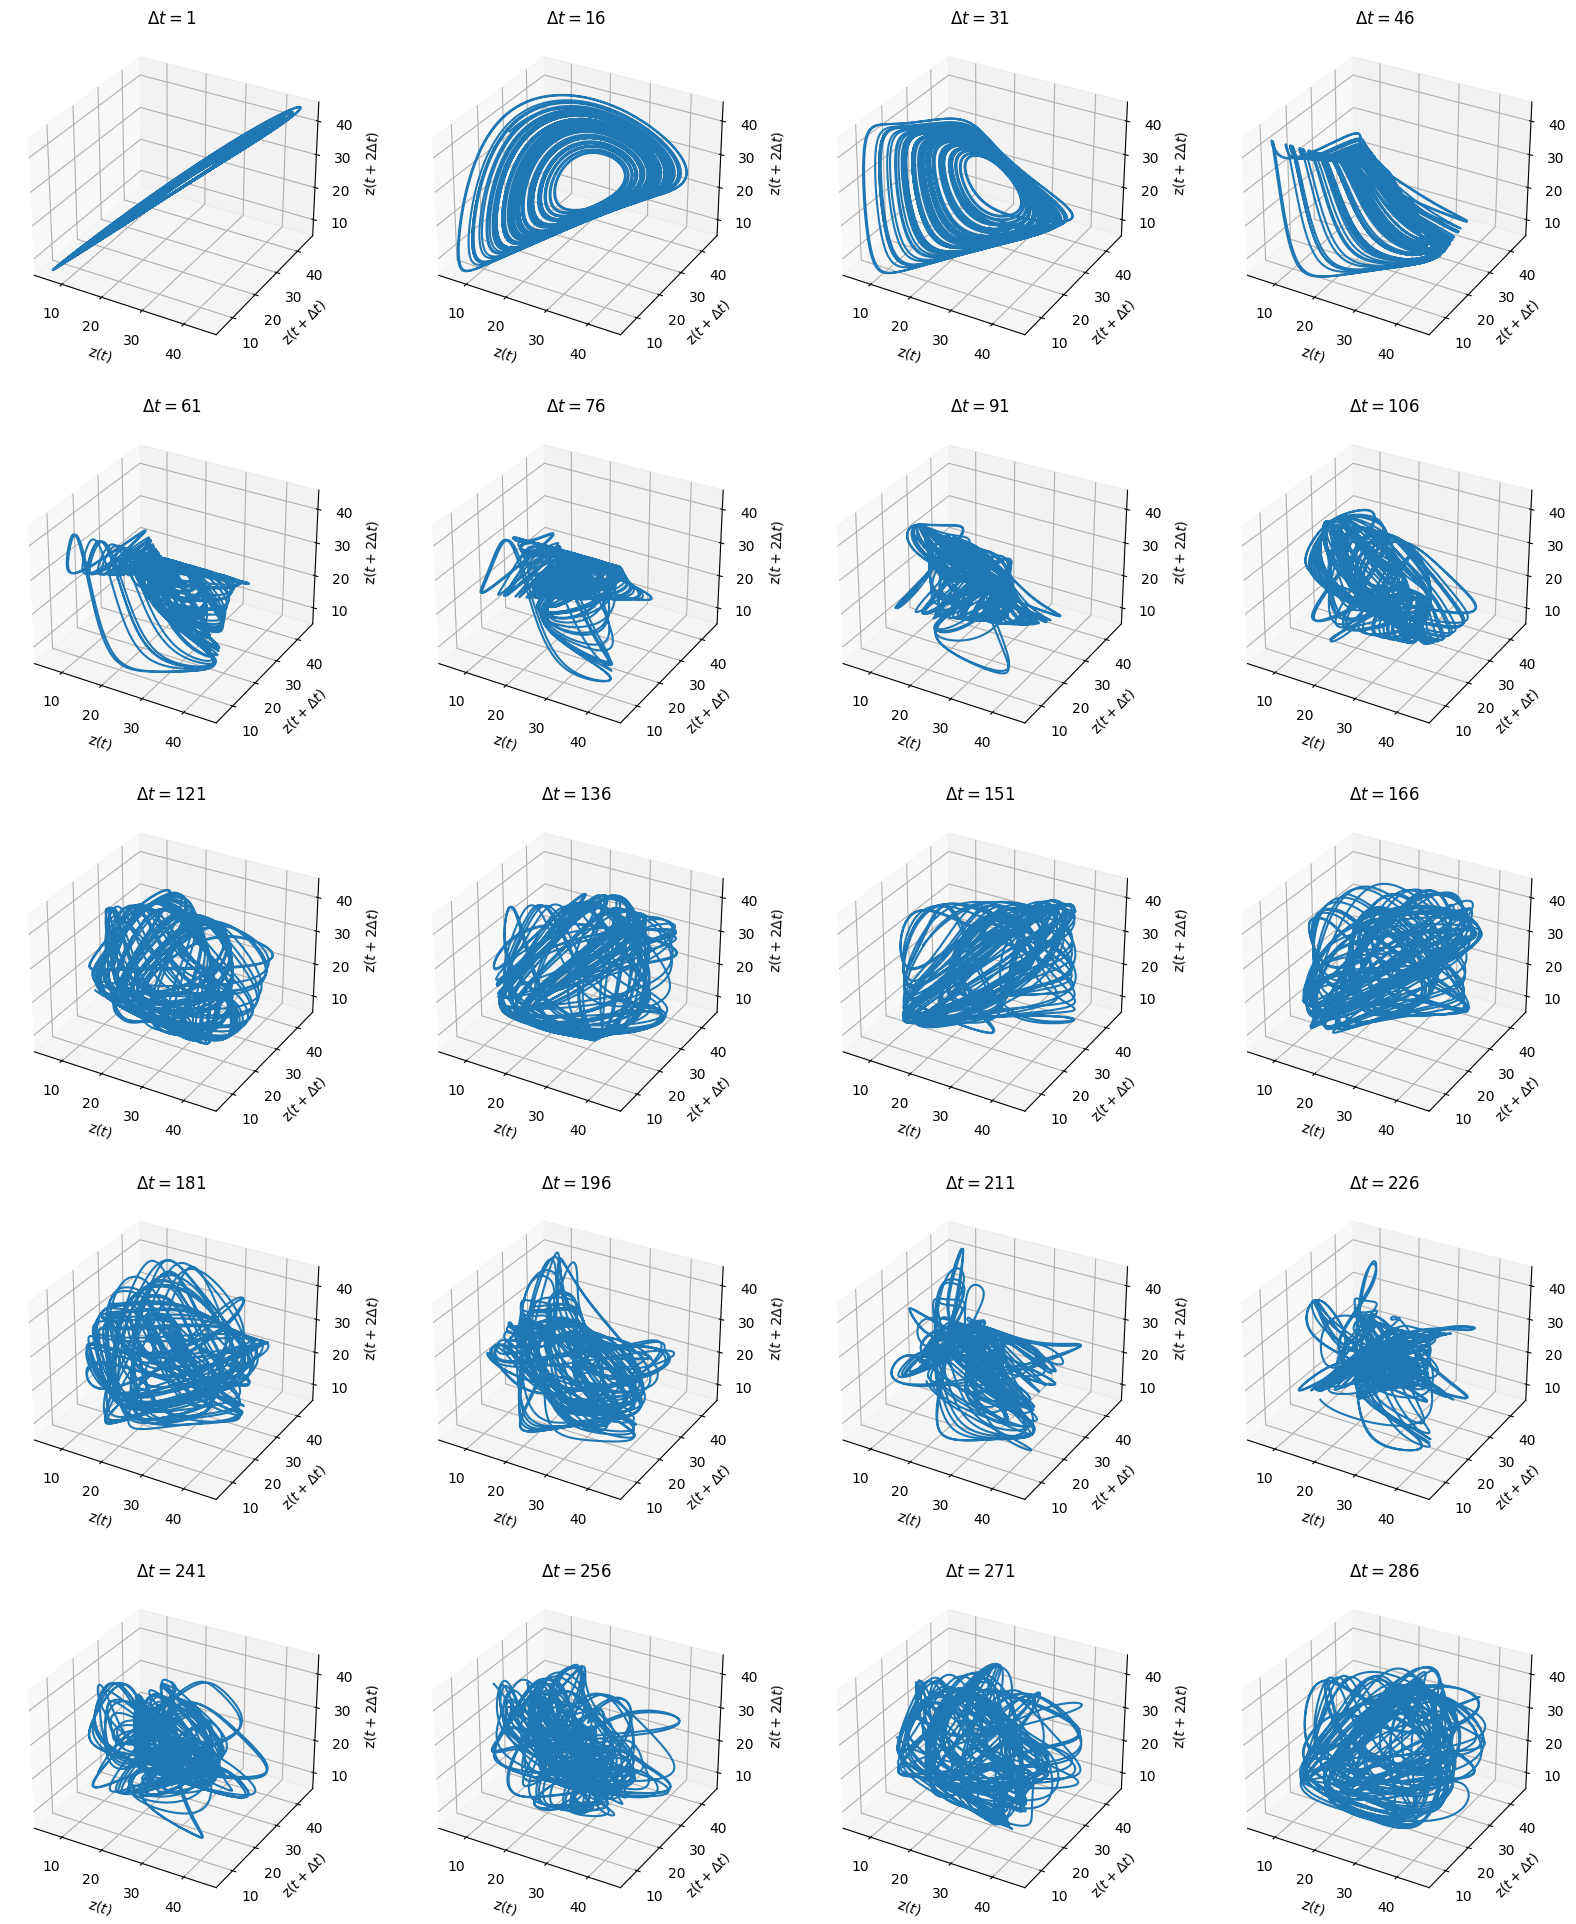

In [77]:
delta_t = np.arange(1,300,15)
plotter.t4_takens(X[:, 2], delta_t, "z")

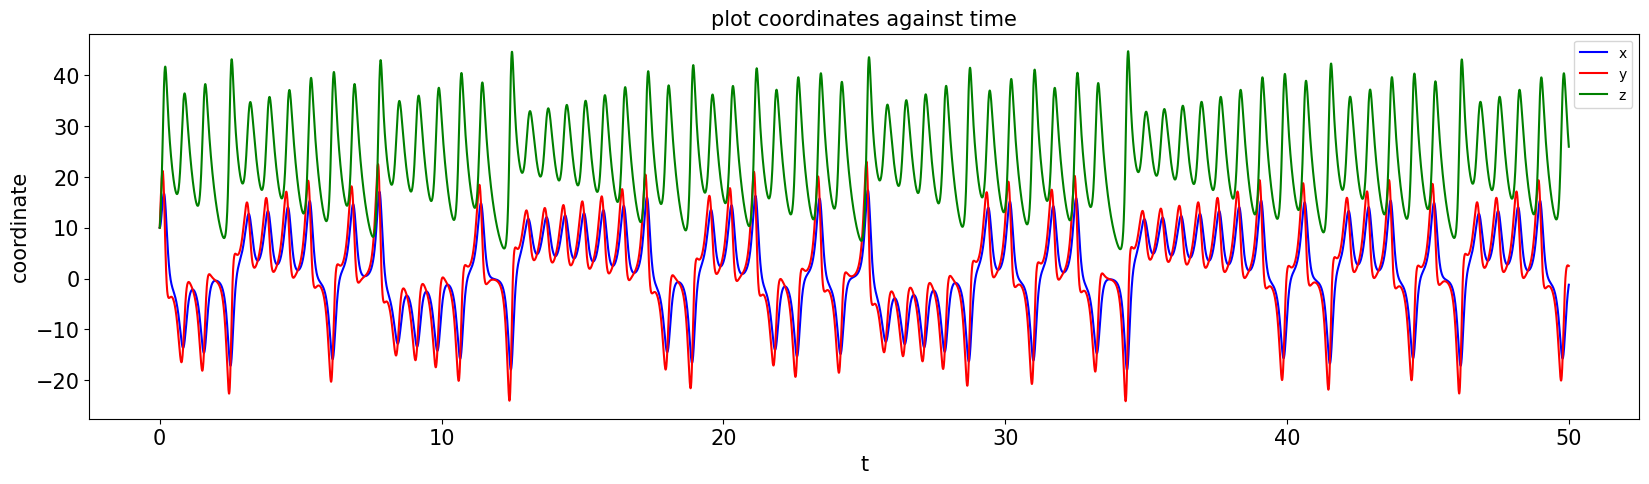

In [78]:
fig = plt.figure(figsize=(20,5))
# ax0 = fig.add_subplot(1, 3, 1)
# ax1 = fig.add_subplot(1, 3, 2)
# ax2 = fig.add_subplot(1, 3, 3)

time_values = np.linspace(start_time, end_time, 10000)

# plotter.t4_coordinate_vs_index(X[:,0], time_values, "x", ax0)
# plotter.t4_coordinate_vs_index(X[:,1], time_values, "y", ax1)
# plotter.t4_coordinate_vs_index(X[:,2], time_values, "z", ax2)

ax0 = fig.add_subplot()

ax0.plot(time_values, X[:,0], color='b', label="x")
ax0.plot(time_values, X[:,1], color='r', label="y")
ax0.plot(time_values, X[:,2], color='g', label="z")

ax0.tick_params(labelsize=15)
ax0.set_xlabel("t", fontdict={'weight':'normal','size': 15})
ax0.set_ylabel("coordinate", fontdict={'weight':'normal','size': 15})
ax0.set_title("plot coordinates against time", fontdict={'weight':'normal','size': 15})
ax0.legend()

### 4.bonus

In [79]:
x = utils.time_delay(X[:,0], 15).T
x_0 = x[:-1]
x_1 = x[1:]
v = (x_1 - x_0) / 0.01

In [80]:
EPSILON = 6.5
L = 20j
GRID_b = np.mgrid[x_0.min():x_0.max():L, x_0.min():x_0.max():L, x_0.min():x_0.max():L]
GRID_b = GRID_b.reshape(3, GRID_b[0].size).T
GRID_b[:, [2, 1, 0]] = GRID_b[:, [0, 1, 2]]
R_COND = 1e-5

In [81]:
coefficients = utils.radial_basis_lst_sqr_approx(x_0, v, GRID_b, EPSILON, R_COND)

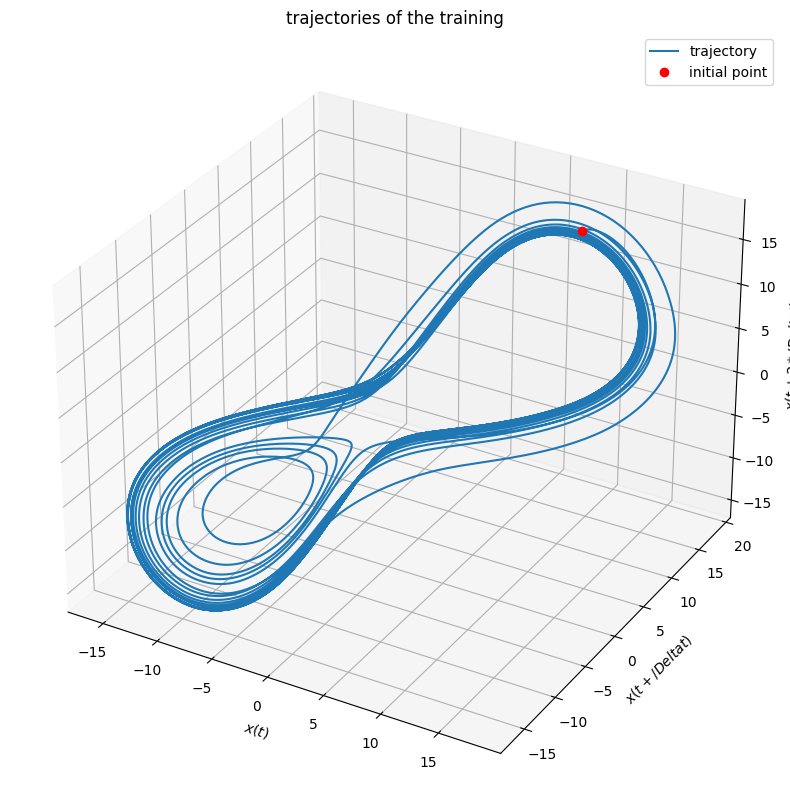

In [82]:
end_time = 50
sovler = utils.t4_fun_radial_trajectory(x_0[0,:], GRID_b, EPSILON, coefficients, start_time, end_time)